In [91]:
import pandas as pd

import os

import numpy as np

import networkx as nx

import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF

from IPython.display import clear_output

import community
from community import community_louvain
from collections import Counter
from networkx.algorithms.community import k_clique_communities

import math



In [92]:
def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig('analysis/positive/{}.png'.format(fig_id), format='png', dpi=300)

In [93]:
df_metrics_values_rows=[]

In [94]:
df_giant_metrics_values_rows=[]

In [95]:
#importo il grafo completo
first_graph = nx.read_gpickle('data/graphs/positive/positive_graph.gpickle')

# Prime misure generali
## Numero di nodi e link

In [96]:
n_nodes = first_graph.number_of_nodes()
n_links = first_graph.number_of_edges()
print("Number of nodes:\t{}".format(n_nodes))
print("Number of links:\t{}".format(n_links))
df_metrics_values_rows.append(('Number of nodes',n_nodes))
df_metrics_values_rows.append(('Number of links',n_links))

Number of nodes:	10577
Number of links:	154621


## Grado medio e densità

In [97]:
degrees_dict = dict(first_graph.degree()).values()
degrees_list = list(degrees_dict)
avg_degree = np.mean(degrees_list)
density = nx.density(first_graph)
print('Average degree:\t{}'.format(avg_degree))
print('Density:\t{}'.format(density))
df_metrics_values_rows.append(('Average degree',avg_degree))
df_metrics_values_rows.append(('Density',density))

Average degree:	29.237212820270397
Density:	0.002764486840040696


# Analisi della distribuzione del grado

In [98]:
std_dev =np.std(degrees_list)
median = np.median(degrees_list)
minimum=np.min(degrees_list)
maximum=np.max(degrees_list)
print("Average degree:\t\t{}".format(avg_degree))
print('Standard deviation:\t{}'.format(std_dev))
print('Median:\t\t\t{}'.format(median))
print('Minimum:\t\t{}'.format(minimum))
print('Maximum:\t\t{}'.format(maximum))
df_metrics_values_rows.append(('Degree standard deviation',std_dev))
df_metrics_values_rows.append(('Median degree',median))
df_metrics_values_rows.append(('Minimum degree',minimum))
df_metrics_values_rows.append(('Maximum degree',maximum))

Average degree:		29.237212820270397
Standard deviation:	36.50942940626366
Median:			10.0
Minimum:		0
Maximum:		250


## ECDF - loglog scale

Saving figure ecdf
Saving figure eccdf


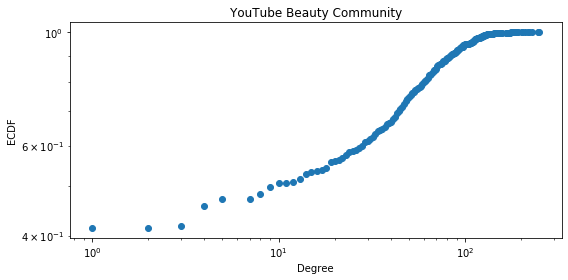

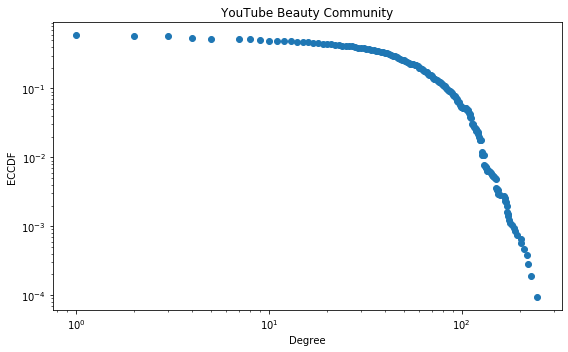

In [99]:
ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)

y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_ylabel('ECDF')
axes.set_xlabel('Degree')
plt.title('YouTube Beauty Community')

save_fig('ecdf')

y = 1-ecdf(x)
fig_ccdf_function = plt.figure(figsize=(8,5))
axes = fig_ccdf_function.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community')

save_fig('eccdf')

## Confronto con rete equivalente E-R

In [100]:
p = density

### Faccio la media di più reti random

In [101]:
er_avgs = []
er_stds = []
er_medians = []
er_mins = []
er_maxs = []

In [102]:
for i in range(10):
    print('{}/10'.format(i))
    clear_output(wait=True)
    random_graph = nx.fast_gnp_random_graph(n_nodes,p)
    er_degrees_dict = dict(random_graph.degree()).values()
    er_degrees_list = list(er_degrees_dict)
    er_avgs.append(np.mean(er_degrees_list))
    er_stds.append(np.std(er_degrees_list))
    er_medians.append(np.median(er_degrees_list))
    er_mins.append(np.min(er_degrees_list))
    er_maxs.append(np.max(er_degrees_list))

9/10


In [103]:
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()

pd_rows=[]

er_avg_degree = np.mean(er_avgs)
er_density = nx.density(random_graph)
er_std_dev = np.mean(er_stds)
er_median = np.mean(er_medians)
er_minimum = np.mean(er_mins)
er_maximum = np.mean(er_maxs)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df_real_er_comparison = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df_real_er_comparison.to_csv('analysis/positive/df_real_er_comparison.csv')
print('NETWORKS COMPARISON')
print(df_real_er_comparison)

NETWORKS COMPARISON
                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  154621.000000   154340.000000
2                    Density       0.002764        0.002759
3             Average degree      29.237213       29.212064
4  Degree standard deviation      36.509429        5.371667
5              Median degree      10.000000       29.000000
6             Minimum degree       0.000000       11.300000
7             Maximum degree     250.000000       52.300000


                 Metric name   Real network  Random network
0            Number of nodes   10577.000000    10577.000000
1            Number of links  154621.000000   154219.000000
2                    Density       0.002764        0.002757
3             Average degree      29.237213       29.161199
4  Degree standard deviation      36.509429        5.400025
5              Median degree      10.000000       29.000000
6             Minimum degree       0.000000       11.000000
7             Maximum degree     250.000000       52.000000
Saving figure YouTube Beauty Community vs Erdos-Renyi


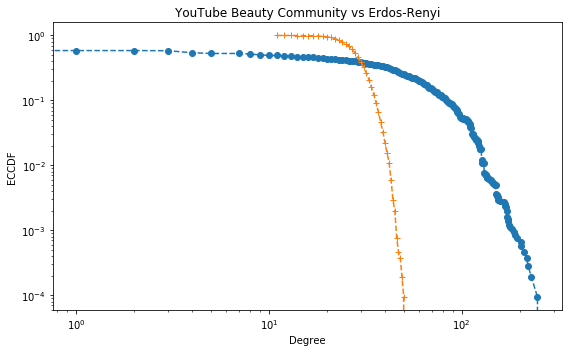

In [104]:
pd_rows=[]

random_graph = nx.fast_gnp_random_graph(n_nodes,p)
er_n_nodes = random_graph.number_of_nodes()
er_n_links = random_graph.number_of_edges()
er_degrees_dict = dict(random_graph.degree()).values()
er_degrees_list = list(er_degrees_dict)
er_avg_degree = np.mean(er_degrees_list)
er_density = nx.density(random_graph)
er_std_dev = np.std(er_degrees_list)
er_median = np.median(er_degrees_list)
er_minimum = np.min(er_degrees_list)
er_maximum = np.max(er_degrees_list)
pd_rows.append(('Number of nodes',n_nodes,er_n_nodes))
pd_rows.append(('Number of links',n_links,er_n_links))
pd_rows.append(('Density',density,er_density))
pd_rows.append(('Average degree',avg_degree,er_avg_degree))
pd_rows.append(('Degree standard deviation',std_dev,er_std_dev))
pd_rows.append(('Median degree',median,er_median))
pd_rows.append(('Minimum degree',minimum,er_minimum))
pd_rows.append(('Maximum degree',maximum,er_maximum))

df = pd.DataFrame(pd_rows, columns=['Metric name','Real network','Random network'])
df.to_csv('analysis/positive/df_real_er_comparison_one.csv')
print(df)

ecdf = ECDF(degrees_list)
x = np.unique(degrees_list)
y = 1-ecdf(x)
er_ecdf = ECDF(er_degrees_list)
er_x = np.unique(er_degrees_list)
er_y = 1-er_ecdf(er_x)

fig_ecdf_youtube = plt.figure(figsize=(8,5))
axes = fig_ecdf_youtube.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='--')
axes.loglog(er_x,er_y,marker = '+', ms = 6, linestyle='--')
axes.set_xlabel('Degree')
axes.set_ylabel('ECCDF')
plt.title('YouTube Beauty Community vs Erdos-Renyi')

save_fig('YouTube Beauty Community vs Erdos-Renyi')

# Hubs

In [105]:
percentile_99 = np.percentile(degrees_list,99)
percentile_95 = np.percentile(degrees_list,95)
print("Percentile 99:{}".format(percentile_99))
print("Percentile 95:{}".format(percentile_95))
df_metrics_values_rows.append(('Percentile 99',percentile_99))

Percentile 99:131.0
Percentile 95:106.0


In [106]:
hub_nodi = [k for k,v in dict(first_graph.degree()).items() if v>= percentile_99]
print(hub_nodi)
df_metrics_values_rows.append(('Number of hubs',len(hub_nodi)))

['Teaira Walker', 'Michelle', 'Marisa Singh', 'Haleigh Yates', 'Natalia', 'Amanda Ensing', 'Jawaid Anwer', 'Rosie Veronica', 'Christine Marie', 'amygirls world', 'Lavender Fields', 'Girl Trucker', 'Erica', 'Christen Dominique', 'Jordan Fields', 'Amanda Clark', 'MoiMoi Khan', 'Latavia Williams', 'Fly with Fizzle', 'c jay', 'Keri Rhinehart', 'EMAN', 'kasarasak k', 'Jaana Olnev', 'Lauren Tokunaga', 'Ilce Geovanna Salinas Morales', 'Trishanaclo', 'Nikita Calimbayan', 'V M', 'Mimi Meyers', 'Kittenx kore', 'Dinar Singer', 'Sherri Hoffman', 'Ash', 'Judy Howell', 'Olivia Miranda', 'Murphy Star', 'Stacey Griego', 'Staci White', 'Annette Espinoza', 'vicwilson87', 'Jackie Aina', 'Graceful Knots', 'K M', 'Amy Meherg', 'lilita p', 'Ishie Boom boom', 'Grace', 'karidish', 'Zainab Noor', 'Sarah', 'kardonay', 'Angie', 'Dee Luther', 'Jessa Marie Pole', 'Ashley Smith', 'Spirit Within Apothecary', 'Camille Anderson', 'Gemma Diaz', 'Cynthia Saikaly', 'Violet Maggs', 'Kay The MilkShake', 'Erika Yuen', 'Jami

In [107]:
np.save('analysis/positive/hubs.npy',hub_nodi)

# Isolates

In [108]:
isolates = list(nx.isolates(first_graph))
print(isolates)
np.save('analysis/positive/isolates.npy',isolates)
df_metrics_values_rows.append(('Number of isolates',len(isolates)))

['Narelys Negron', '도연Doyeon', 'Alexa Levidi', 'Anni Duky', 'l e x i m o n t y', 'Nancy Rodriguez', 'Jenny Jen1010', "DIzzyY's MSD", 'Stephanie Shaffer', 'SamGal1624', 'Arielle Brittany', 'Kobe Pina', 'Kitty Keylee', 'Cathy Bynum', 'Her Majesty THE Queen', 'Katie Moore', 'Chasadie Pinnock', 'Katie Dahl', 'Mai Vang', 'Wawters', 'Olivia P', 'Audrey Barr', 'Maria Monteverde', 'Courtney Douglass', 'MsZa124', 'Alyssa Poplaski', 'Nina Bina', 'Jess Wd', 'Atari Artistry', 'Inna Morozova', 'Ana R. Alvarez', 'Alma Martinez', 'brittany schooley', 'Jordyn Halee', 'The Fonz', 'Katrina Padron', 'Lupe Martinez', 'F Mochi', 'Samantha Gambill', 'moonwitch', 'Sara H', 'Della', 'Ashley Holenchick', 'Sarah Foshee', 'kazeem786', 'Charmaine Kwin', 'Matilde Raab', 'Siera Wright', 'emma bellgowan', 'Alex Green', 'Christlee Hooks', 'Catqueen 2107', 'Jheramie Mendoza', 'Beauty by Ally Benavidez', 'Julia Caldera', 'Fetiha ፈቲያ', 'Gloria Watson', 'Deanna', 'cassandra weishaar', 'Karina Mendez', 'Jackie Garcia', 'J

# Connettività

In [109]:
print("The network is {}.".format("connected" if nx.is_connected(first_graph) else "not connected"))
n_components = nx.number_connected_components(first_graph)
print("There are {} components.".format(n_components))
df_metrics_values_rows.append(('Number of connected components',n_components))

The network is not connected.
There are 4434 components.


In [110]:
connected_components = []
for component in nx.connected_components(first_graph):
    connected_components.append(component)
np.save('analysis/positive/connected_components.npy',connected_components)

## Studio della giant component

In [111]:
giant_component = max([(first_graph.subgraph(c).copy(),first_graph.subgraph(c).copy().order()) for c in nx.connected_components(first_graph)],key = lambda x:x[1])
giant_component=giant_component[0]

In [112]:
giant_degrees_dict = dict(giant_component.degree()).values()
giant_degrees_list = list(giant_degrees_dict)
giant_density = nx.density(giant_component)
giant_avg_degree = np.mean(giant_degrees_list)
giant_std_dev =np.std(giant_degrees_list)
giant_median = np.median(giant_degrees_list)
giant_minimum=np.min(giant_degrees_list)
giant_maximum=np.max(giant_degrees_list)
df_giant_metrics_values_rows.append(('Average degree',giant_avg_degree))
df_giant_metrics_values_rows.append(('Density',giant_density))
df_giant_metrics_values_rows.append(('Degree standard deviation',giant_std_dev))
df_giant_metrics_values_rows.append(('Median degree',giant_median))
df_giant_metrics_values_rows.append(('Minimum degree',giant_minimum))
df_giant_metrics_values_rows.append(('Maximum degree',giant_maximum))
print("Average degree:\t\t{}".format(giant_avg_degree))
print('Density:\t\t{}'.format(giant_density))
print('Standard deviation:\t{}'.format(giant_std_dev))
print('Median:\t\t\t{}'.format(giant_median))
print('Minimum:\t\t{}'.format(giant_minimum))
print('Maximum:\t\t{}'.format(giant_maximum))

Average degree:		52.628482972136226
Density:		0.0090535838589603
Standard deviation:	34.638492568131035
Median:			48.0
Minimum:		2
Maximum:		250


## Distribuzione della size delle componenti connesse

Saving figure Connected component size distribution


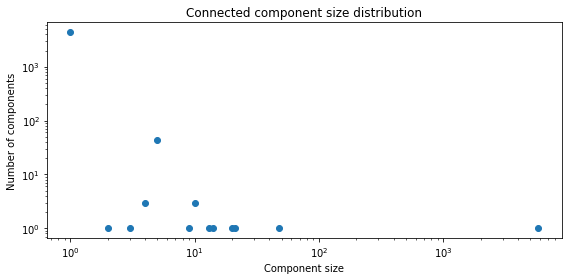

In [113]:
x = np.unique([len(c) for c in connected_components])

y = []
counter=0
for sz in x:
    for c in connected_components:
        if len(c) == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Component size')
axes.set_ylabel('Number of components')
plt.title('Connected component size distribution')

save_fig('Connected component size distribution')

# Transitività

In [114]:
avg_clustering_coeff = nx.average_clustering(first_graph)
df_metrics_values_rows.append(('Average local clustering coefficient',avg_clustering_coeff))

In [115]:
transitivity = nx.transitivity(first_graph)
df_metrics_values_rows.append(("Transitivity (global clustering)",transitivity))

In [116]:
clustering=nx.clustering(first_graph)
np.save('analysis/positive/clustering.npy',clustering)

In [117]:
print('Transitivity (global clustering):{}'.format(transitivity))
print('Average local clustering coefficient:{}'.format(avg_clustering_coeff))
print('Local clustering:{}'.format(clustering))

Transitivity (global clustering):0.7006883999919056
Average local clustering coefficient:0.44923659574195024
Local clustering:{'Narelys Negron': 0, '도연Doyeon': 0, 'Alexa Levidi': 0, 'Jodes G': 0.8301886792452831, 'Anni Duky': 0, 'Sonnett Chevans': 1.0, 'Kat': 0.45401116661769025, 'Laura and Adam': 0.53319357092942, 'Allison R': 0.793306196291271, 'Melcah Nacionales': 0.6566049983771503, 'l e x i m o n t y': 0, 'Nancy Rodriguez': 0, 'Jenny Jen1010': 0, 'CPFN': 0.9450757575757576, "DIzzyY's MSD": 0, 'Stephanie Shaffer': 0, 'Ketsen Boy': 1.0, 'Stephanie Helzer': 1.0, 'SamGal1624': 0, 'Arielle Brittany': 0, 'Rita Holmes': 0.3253968253968254, 'Amber Rhinehart': 0.4804421768707483, 'Enimsaj Htby': 0.9450757575757576, 'Tasha22Bella': 0.42857142857142855, 'Ayesha Fountain': 1.0, 'Marli Marlirni': 0.3917525773195876, 'Kobe Pina': 0, 'Kitty Keylee': 0, 'Bidiya K Damian': 0.9680851063829787, 'Cathy Bynum': 0, 'Her Majesty THE Queen': 0, 'Madiha Fatima': 0.790356394129979, 'Katie Moore': 0, 'Mari 

In [118]:
local_clustering_dev_std = np.std(list(clustering.values()))
local_clustering_min = np.min(list(clustering.values()))
local_clustering_max = np.max(list(clustering.values()))
local_clustering_mean = np.mean(list(clustering.values()))
local_clustering_median = np.median(list(clustering.values()))
df_metrics_values_rows.append(("Average local clustering (mediated)",local_clustering_mean))
df_metrics_values_rows.append(("Local clustering standard deviation (mediated)",local_clustering_dev_std))
df_metrics_values_rows.append(("Median local clustering (mediated)",local_clustering_median))
df_metrics_values_rows.append(("Minimum local clustering (mediated)",local_clustering_min))
df_metrics_values_rows.append(("Maximum local clustering (mediated)",local_clustering_max))
print("Average local clustering (mediated):\t\t{}".format(local_clustering_mean))
print('Local clustering standard deviation (mediated):\t{}'.format(local_clustering_dev_std))
print('Median local clustering (mediated):\t\t{}'.format(local_clustering_median))
print('Minimum local clustering (mediated):\t\t{}'.format(local_clustering_min))
print('Maximum local clustering (mediated):\t\t{}'.format(local_clustering_max))

Average local clustering (mediated):		0.4492365957419479
Local clustering standard deviation (mediated):	0.40838446160122654
Median local clustering (mediated):		0.5614035087719298
Minimum local clustering (mediated):		0.0
Maximum local clustering (mediated):		1.0


Saving figure Local clustering coefficient distribution


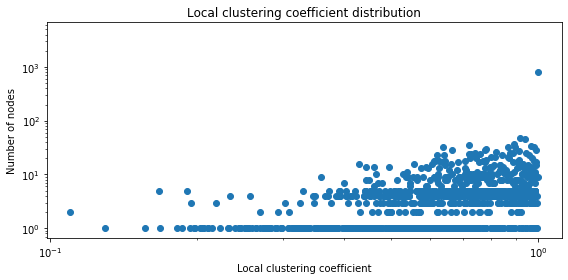

In [119]:
x = np.unique([item for item in list(clustering.values())])

y = []
counter=0
for sz in x:
    for item in list(clustering.values()):
        if item == sz:
            counter+=1
    y.append(counter)
    counter = 0
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('Number of nodes')
plt.title('Local clustering coefficient distribution')

save_fig('Local clustering coefficient distribution')

Saving figure ECDF Local clustering coefficient distribution


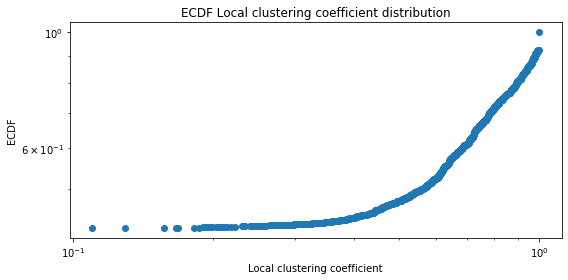

In [120]:
ecdf = ECDF(list(clustering.values()))
x = np.unique(list(clustering.values()))
y = ecdf(x)
fig_ecdf = plt.figure(figsize=(8,4))
axes = fig_ecdf.gca()
axes.loglog(x,y,marker = 'o', ms = 6, linestyle='None')
axes.set_xlabel('Local clustering coefficient')
axes.set_ylabel('ECDF')
plt.title('ECDF Local clustering coefficient distribution')

save_fig('ECDF Local clustering coefficient distribution')

# Assortativity

In [121]:
degree_assortativity = nx.degree_assortativity_coefficient(first_graph)
df_metrics_values_rows.append(("Degree assortativity",degree_assortativity))

In [122]:
print("Degree assortativity:{}".format(degree_assortativity))

Degree assortativity:0.4035370382765074


In [123]:
nodes_attributes = []
for n in first_graph.nodes().values():
    nodes_attributes = list(n.keys())
    break

In [124]:
assortativity_coefficients = []
for idx, attr in enumerate(nodes_attributes):
    print('{}/{}'.format(idx,len(nodes_attributes)))
    clear_output(wait=True)
    assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(first_graph,attr)))
np.save('analysis/positive/assortativity_coefficients.npy',assortativity_coefficients)

237/238


In [125]:
assortativity_coefficients

[('halo beauty', 0.522727978684313),
 ('sally hansen', 0.13624073776735698),
 ('inglot cosmetics', nan),
 ('Sona Gasparian', 0.7479769333811561),
 ('candy girl', 0.1602636422242973),
 ('nyc new york color', 0.266548974706055),
 ('Katy', 0.7143613544434045),
 ('doll 10', nan),
 ('la girl', 0.31410803820061717),
 ('clarins', 0.21724831566951447),
 ('rouge bunny rouge', -0.00023288158578810663),
 ('PatrickStarrr', 0.7886505007278226),
 ('pet', 0.1372366480751219),
 ('Summer Mckeen', 0.9701158706491837),
 ('James Charles', 0.9645166564186317),
 ('KathleenLights', 0.8390181972835038),
 ('danielle rae', 0.8213832688983739),
 ('Teni Panosian', 0.7798063492697369),
 ('anastasia beverly hills', 0.6945854844271027),
 ('neutrogena', 0.08504128574304692),
 ('everyday minerals', nan),
 ('MonicaStyle Muse', 0.7972626228221158),
 ('sol body', 0.3807421181886606),
 ('Nabela Noor', 0.9289054134531352),
 ('lifestyle', 0.6750414522247095),
 ('armani', 0.11828075049908593),
 ('EMAN', 0.7637548879798493),


In [126]:
assortativity_min = min(assortativity_coefficients, key=lambda x: x[1])
assortativity_max = max(assortativity_coefficients, key=lambda x: x[1])
nan_assortativity_values = [item for item in assortativity_coefficients if math.isnan(item[1])]
np.save('analysis/positive/nan_assortativity_values.npy',nan_assortativity_values)
df_metrics_values_rows.append(("Minimum assortativity cofficient",assortativity_min))
df_metrics_values_rows.append(("Maximum assortativity cofficient",assortativity_max))
df_metrics_values_rows.append(("Number of NaN assortativity values",len(nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(nan_assortativity_values),nan_assortativity_values))

Minimum assortativity cofficient:		('cheap', -0.001973217381186296)
Maximum assortativity cofficient:		('parachute', 1.0)
NaN assortativity values:		19
[('inglot cosmetics', nan), ('doll 10', nan), ('everyday minerals', nan), ('hard candy', nan), ('coppertone', nan), ('video_game_culture', nan), ('princess pat', nan), ('Olivia Jade', nan), ('calvin klein', nan), ('burberry', nan), ('tropic skincare', nan), ('almay', nan), ('lip smacker', nan), ('role-playing_video_game', nan), ('kryolan', nan), ("burt's bees", nan), ('simulation_video_game', nan), ('avon products', nan), ('sonia kashuk', nan)]


## Assortatività nella giant component

In [127]:
print("GIANT COMPONENT")
giant_degree_assortativity = nx.degree_assortativity_coefficient(giant_component)
df_giant_metrics_values_rows.append(("Degree assortativity",giant_degree_assortativity))
print("Degree assortativity:{}".format(giant_degree_assortativity))
giant_nodes_attributes = []
for n in giant_component.nodes().values():
    giant_nodes_attributes = list(n.keys())
    break
giant_assortativity_coefficients = []
for idx, attr in enumerate(giant_nodes_attributes):
    print('{}/{}'.format(idx,len(giant_nodes_attributes)))
    clear_output(wait=True)
    giant_assortativity_coefficients.append((attr,nx.attribute_assortativity_coefficient(giant_component,attr)))
np.save('analysis/positive/giant_assortativity_coefficients.npy',giant_assortativity_coefficients)
giant_assortativity_min = min(giant_assortativity_coefficients, key=lambda x: x[1])
giant_assortativity_max = max(giant_assortativity_coefficients, key=lambda x: x[1])
giant_nan_assortativity_values = [item for item in giant_assortativity_coefficients if math.isnan(item[1])]
df_giant_metrics_values_rows.append(("Minimum assortativity cofficient",giant_assortativity_min))
df_giant_metrics_values_rows.append(("Maximum assortativity cofficient",giant_assortativity_max))
df_giant_metrics_values_rows.append(("Number of NaN assortativity values",len(giant_nan_assortativity_values)))
print('Minimum assortativity cofficient:\t\t{}'.format(giant_assortativity_min))
print('Maximum assortativity cofficient:\t\t{}'.format(giant_assortativity_max))
print('NaN assortativity values:\t\t{}\n{}'.format(len(giant_nan_assortativity_values),giant_nan_assortativity_values))

Minimum assortativity cofficient:		('cheap', -0.0019942824021954146)
Maximum assortativity cofficient:		('SoothingSista', 0.9798734518454341)
NaN assortativity values:		30
[('inglot cosmetics', nan), ('doll 10', nan), ('everyday minerals', nan), ('rhythm_and_blues', nan), ('hard candy', nan), ('coppertone', nan), ('video_game_culture', nan), ('princess pat', nan), ('Olivia Jade', nan), ('calvin klein', nan), ('burberry', nan), ('tropic skincare', nan), ('soul_music', nan), ('nivea', nan), ('fairy girl', nan), ('almay', nan), ('parachute', nan), ('lip smacker', nan), ('role-playing_video_game', nan), ('kryolan', nan), ('hip_hop_music', nan), ("burt's bees", nan), ('cyo cosmetics', nan), ('max factor', nan), ('vegan', nan), ('simulation_video_game', nan), ('pacifica', nan), ('barry m', nan), ('avon products', nan), ('sonia kashuk', nan)]


# Community detection

In [128]:
partition_louvain = community_louvain.best_partition(first_graph)
np.save('analysis/positive/partition_louvain.npy',partition_louvain)
number_of_communities = len(set(partition_louvain.values()))
print('Number of communities: ', number_of_communities)
df_metrics_values_rows.append(("Number of communities",number_of_communities))
print(Counter(partition_louvain.values()))

Number of communities:  4476
Counter({50: 441, 41: 233, 7: 231, 42: 202, 68: 195, 3: 189, 72: 180, 182: 163, 40: 161, 48: 161, 9: 157, 20: 150, 83: 148, 104: 148, 88: 146, 138: 142, 5: 136, 102: 136, 116: 134, 87: 133, 6: 127, 21: 127, 32: 125, 74: 122, 16: 120, 23: 119, 156: 119, 19: 113, 22: 112, 8: 110, 39: 105, 91: 105, 35: 97, 58: 95, 82: 95, 129: 85, 52: 82, 47: 76, 33: 69, 13: 64, 86: 62, 105: 61, 46: 48, 267: 38, 281: 21, 190: 20, 171: 14, 187: 13, 140: 10, 246: 10, 959: 10, 1179: 9, 63: 5, 70: 5, 89: 5, 90: 5, 98: 5, 108: 5, 147: 5, 165: 5, 166: 5, 263: 5, 373: 5, 388: 5, 392: 5, 395: 5, 407: 5, 410: 5, 421: 5, 427: 5, 541: 5, 543: 5, 550: 5, 600: 5, 612: 5, 678: 5, 714: 5, 763: 5, 797: 5, 845: 5, 863: 5, 872: 5, 1143: 5, 1191: 5, 1326: 5, 1333: 5, 1348: 5, 1442: 5, 1467: 5, 1519: 5, 1895: 5, 1918: 5, 2216: 5, 2798: 5, 3017: 5, 702: 4, 900: 4, 1975: 4, 1595: 3, 2623: 2, 0: 1, 1: 1, 2: 1, 4: 1, 10: 1, 11: 1, 12: 1, 14: 1, 15: 1, 17: 1, 18: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 

In [129]:
modularity = community.modularity(partition_louvain,first_graph)
df_metrics_values_rows.append(("Modularity",modularity))
print('Modularity:', modularity)

Modularity: 0.906816922612475


## Community detection nella giant component

In [130]:
giant_partition_louvain = community_louvain.best_partition(giant_component)
np.save('analysis/positive/giant_partition_louvain.npy',giant_partition_louvain)
giant_number_of_communities = len(set(giant_partition_louvain.values()))
print('Number of communities: ', giant_number_of_communities)
df_giant_metrics_values_rows.append(("Number of communities",giant_number_of_communities))
print(Counter(giant_partition_louvain.values()))

Number of communities:  42
Counter({20: 355, 30: 332, 3: 291, 17: 277, 24: 225, 0: 189, 25: 180, 40: 163, 5: 158, 38: 154, 9: 150, 27: 148, 32: 148, 11: 144, 16: 138, 1: 136, 8: 136, 7: 134, 34: 134, 19: 133, 29: 133, 35: 132, 23: 129, 2: 127, 14: 127, 13: 125, 12: 119, 10: 113, 4: 110, 31: 107, 15: 105, 26: 95, 22: 91, 39: 86, 36: 85, 21: 82, 18: 76, 6: 64, 28: 62, 33: 61, 41: 38, 37: 22})


In [131]:
giant_modularity = community.modularity(giant_partition_louvain,giant_component)
df_giant_metrics_values_rows.append(("Modularity",giant_modularity))
print('Modularity:', giant_modularity)

Modularity: 0.9051416464688079


# Saving lines

In [132]:
df_metrics_values = pd.DataFrame(df_metrics_values_rows, columns=['Metric name','Value'])
df_metrics_values.to_csv('analysis/positive/df_metrics_values.csv')

In [133]:
df_metrics_values

,Metric name,Value
0,Number of nodes,10577
1,Number of links,154621
2,Average degree,29.2372
3,Density,0.00276449
4,Degree standard deviation,36.5094
5,Median degree,10
6,Minimum degree,0
7,Maximum degree,250
8,Percentile 99,131
9,Number of hubs,114


In [134]:
giant_df_metrics_values = pd.DataFrame(df_giant_metrics_values_rows, columns=['Metric name','Value'])
giant_df_metrics_values.to_csv('analysis/positive/giant_df_metrics_values.csv')
giant_df_metrics_values

,Metric name,Value
0,Average degree,52.6285
1,Density,0.00905358
2,Degree standard deviation,34.6385
3,Median degree,48
4,Minimum degree,2
5,Maximum degree,250
6,Degree assortativity,0.387127
7,Minimum assortativity cofficient,"(cheap, -0.0019942824021954146)"
8,Maximum assortativity cofficient,"(SoothingSista, 0.9798734518454341)"
9,Number of NaN assortativity values,30
